# 1. Dataset overview

First we download the dataset from huggingFace using `load_dataset` module.

In [ ]:
from datasets import load_dataset
ds = load_dataset("ag_news")



train_texts = ds["train"]["text"]
train_labels = ds["train"]["label"]

test_texts = ds["test"]["text"]
test_labels = ds["test"]["label"]


In [ ]:
print(ds)

# Class distribution in training set
import pandas as pd
train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
train_df["label"].value_counts(normalize=True)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


label
2    0.25
3    0.25
1    0.25
0    0.25
Name: proportion, dtype: float64

In [18]:
trai333 = ds["train"]["text"][1]
trai333


'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.'

As seen above we have a balanced dataset which is great to obtain a non-biased model. However in more serious scenarios the dataset is pretty imbalanced.

# 2. Text Length analysis

We can see that the number of words for each class is actually quite balanced

In [16]:
train_df["char_len"] = train_df["text"].str.len()
train_df["word_len"] = train_df["text"].str.split().apply(len)

#train_df["char_len"].describe()
train_df["word_len"].describe()

count    120000.000000
mean         37.847450
std          10.085245
min           8.000000
25%          32.000000
50%          37.000000
75%          43.000000
max         177.000000
Name: word_len, dtype: float64

# 3. Most Common Words (Perclass and overall)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=50)
X = vectorizer.fit_transform(train_texts)
vectorizer.get_feature_names_out()


array(['39', 'afp', 'ap', 'com', 'company', 'corp', 'day', 'friday',
       'game', 'government', 'group', 'gt', 'internet', 'iraq', 'lt',
       'microsoft', 'million', 'monday', 'new', 'night', 'oil', 'people',
       'percent', 'president', 'prices', 'quot', 'reuters', 'said',
       'saturday', 'says', 'season', 'second', 'security', 'software',
       'stocks', 'sunday', 'team', 'thursday', 'time', 'today', 'tuesday',
       'united', 'wednesday', 'week', 'win', 'world', 'year', 'years',
       'yesterday', 'york'], dtype=object)

In [ ]:
from collections import Counter

def top_words(texts, n=20):
    all_words = " ".join(texts).split()
    return Counter(all_words).most_common(n)

for label in range(4):
    print(f"Class {label} top words:")
    print(top_words(train_df[train_df["label"] == label]["text"]))

Class 0 top words:
[('the', 42478), ('in', 31207), ('to', 30630), ('of', 28724), ('a', 26785), ('and', 17397), ('on', 15691), ('-', 13514), ('for', 11225), ('that', 6670), ('#39;s', 6537), ('The', 5862), ('as', 5799), ('at', 5730), ('with', 5651), ('said', 5431), ('by', 5236), ('an', 4890), ('his', 4731), ('has', 4477)]
Class 1 top words:
[('the', 56382), ('to', 27156), ('a', 24395), ('in', 23118), ('of', 20104), ('and', 15398), ('for', 13236), ('on', 11824), ('#39;s', 9414), ('at', 9058), ('-', 8728), ('with', 7660), ('his', 7647), ('The', 6585), ('as', 5289), ('was', 5255), ('is', 4547), ('that', 4180), ('has', 4041), ('he', 3903)]
Class 2 top words:
[('the', 37964), ('to', 29358), ('a', 23461), ('of', 22536), ('in', 21409), ('and', 16849), ('on', 16154), ('for', 11726), ('its', 9303), ('-', 9010), ('#39;s', 8909), ('as', 7931), ('that', 7121), ('said', 6624), ('The', 6180), ('by', 5727), ('it', 5718), ('(Reuters)', 5555), ('US', 5449), ('with', 4657)]
Class 3 top words:
[('the', 407

# 4. Bigram/Trigram Frequency

We can check which words usually go together

In [20]:
vectorizer = CountVectorizer(stop_words="english", ngram_range=(3,3), max_features=20)
X = vectorizer.fit_transform(train_texts)
vectorizer.get_feature_names_out()

array(['boston red sox', 'com fullquote aspx', 'corp lt href',
       'fullquote aspx ticker', 'gt lt font', 'gt lt gt', 'href http www',
       'http www investor', 'investor reuters com', 'lt gt lt',
       'lt href http', 'new york reuters', 'press canadian press',
       'quickinfo fullquote gt', 'quote profile research',
       'reuters com fullquote', 'stocks quickinfo fullquote',
       'target stocks quickinfo', 'world 39 largest',
       'www investor reuters'], dtype=object)

# 5. Basic Text cleaning check

In [ ]:
train_df.sample(10)["text"].values

array(['US Firm Plans Macau #39;s Biggest Ever Casino: Report An American casino company spearheading new growth in Macau #39;s 150-year-old gambling industry plans to open the biggest gaming hall the southern Chinese enclave has ever seen.',
       'Sharon Battles to Save Government from Collapse  JERUSALEM (Reuters) - Reeling from a parliamentary defeat,  Israeli Prime Minister Ariel Sharon prepared on Thursday to  open coalition talks to save his shattered government and avoid  early elections that could stall his Gaza withdrawal plan.',
       'MLB: Exposed In the wake of what has been one of the most explosive days in Major League Baseball history, fans of America #39;s National Pastime are now forced to take a seat and consider all that is unfolding before them.',
       'Powerful blast rocks Bordeaux city hall (AFP) AFP - The city hall of the southwestern French city of Bordeaux was damaged by a powerful explosion overnight, witnesses saw.',
       '"2046" makers deny "Oscars" s

# 6. Vocabulary size and Coverage

Now we check how many unique words we have in our dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
cv.fit(train_texts)
vocab = cv.vocabulary_
print("Vocab size:", len(vocab))

Vocab size: 64702


# 7. Class specific Word clouds. 

This is generally for visual purposes. But actually you can guess the name of the classes without even knowing the name of the classes. 

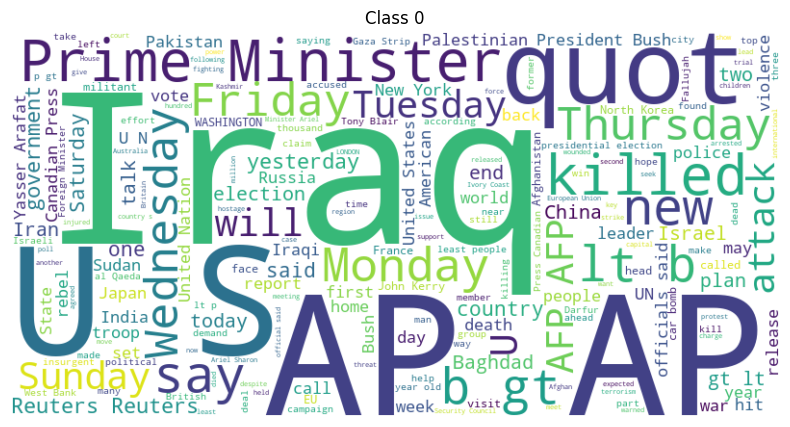

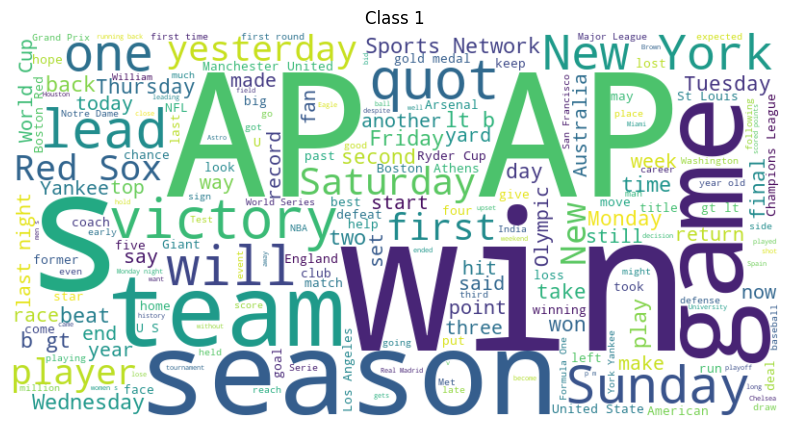

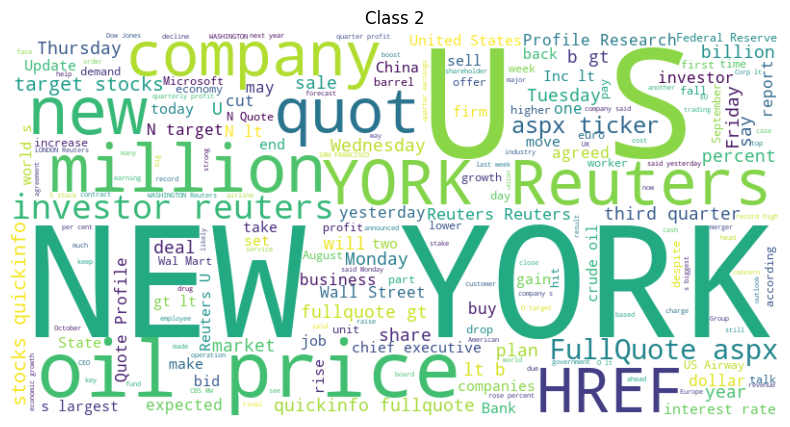

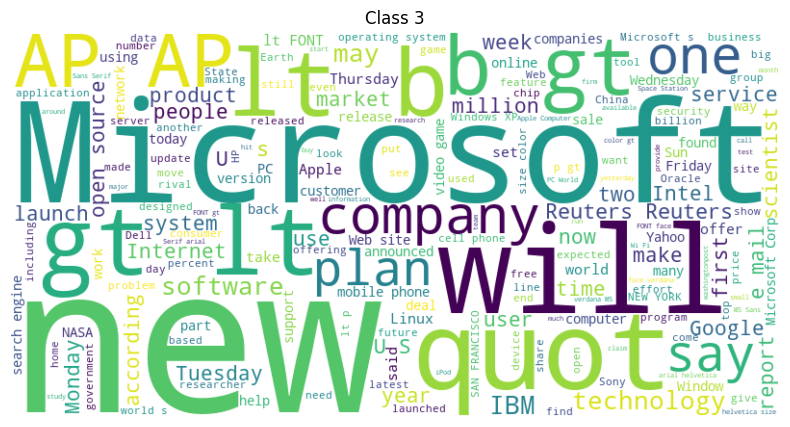

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in range(4):
    subset = train_df[train_df["label"] == label]["text"]
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(subset))
    plt.figure(figsize=(10,5))
    plt.title(f"Class {label}")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")


# 8. TF-IDF Visualization with PCA

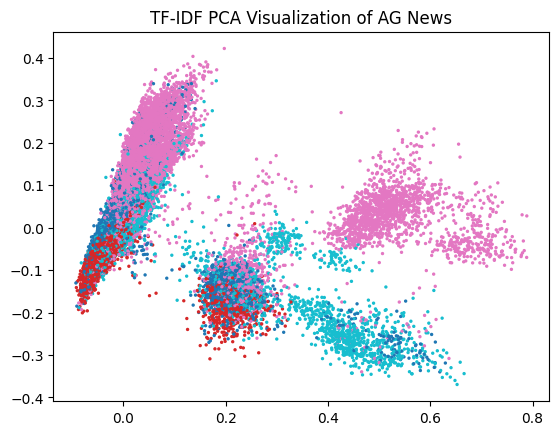

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(train_texts)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_tfidf.toarray())

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=train_labels, cmap="tab10", s=2)
plt.title("TF-IDF PCA Visualization of AG News")
plt.show()
